In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import chi2_contingency

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
submession_df=pd.read_csv('sample_submission.csv')


In [3]:
submession_df

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [3]:
train_df.shape

(1460, 81)

In [4]:
test_df.shape

(1459, 80)

In [5]:
((train_df.isnull().sum()/train_df.shape[0])*100).sort_values(ascending=False)[:10]

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
dtype: float64

In [6]:
((test_df.isnull().sum()/test_df.shape[0])*100).sort_values(ascending=False)[:10]

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageCond       5.346127
GarageQual       5.346127
GarageYrBlt      5.346127
GarageFinish     5.346127
dtype: float64

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
ID=test_df['Id']
ID

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [10]:

train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Preparation Data :

In [11]:
def preparation_Data(df):
    df['PoolQC'].replace(np.nan,'No_Pool',inplace=True )
    df['MiscFeature'].replace(np.nan,'None',inplace=True )
    df['Fence'].replace(np.nan,'No_fence',inplace=True )
    df['GarageCond'].replace(np.nan,'No_Garage',inplace=True )
    df['GarageQual'].replace(np.nan,'No_Garage',inplace=True )
    df['GarageFinish'].replace(np.nan,'No_Garage',inplace=True )
    df['GarageType'].replace(np.nan,'No_Garage',inplace=True )
    df['FireplaceQu'].replace(np.nan,'No_Fireplace',inplace=True )
    df['BsmtFinType2'].replace(np.nan,'No_Basement',inplace=True )
    df['BsmtFinType1'].replace(np.nan,'No_Basement',inplace=True )
    df['BsmtExposure'].replace(np.nan,'No_Basement',inplace=True )
    df['BsmtCond'].replace(np.nan,'No_Basement',inplace=True )
    df['BsmtQual'].replace(np.nan,'No_Basement',inplace=True )
    df['Alley'].replace(np.nan,'No_alley_access',inplace=True )
    return df

In [12]:
preparation_Data(train_df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,No_Pool,No_fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,No_Pool,No_fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,No_Pool,No_fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,No_Pool,No_fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,No_Pool,No_fence,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,No_Pool,No_fence,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,No_Pool,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,No_Pool,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,No_Pool,No_fence,None,0,4,2010,WD,Normal,142125


In [13]:
preparation_Data(test_df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,No_alley_access,Reg,Lvl,AllPub,...,120,0,No_Pool,MnPrv,None,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,0,No_Pool,No_fence,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,0,No_Pool,MnPrv,None,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,0,No_Pool,No_fence,None,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,No_alley_access,IR1,HLS,AllPub,...,144,0,No_Pool,No_fence,None,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,0,No_Pool,No_fence,None,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,0,No_Pool,No_fence,None,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,0,No_Pool,No_fence,None,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,0,No_Pool,MnPrv,Shed,700,7,2006,WD,Normal


In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [15]:
test_df.drop('Id',inplace=True,axis=1)
train_df.drop('Id',inplace=True,axis=1)

In [16]:
target=train_df['SalePrice']
#train_df=train_df.drop('SalePrice',axis=1)
column_numeric_target=train_df.select_dtypes(exclude='object').columns
column_numeric=train_df.select_dtypes(exclude='object').columns.difference(['SalePrice'])
column_object=train_df.select_dtypes(include='object').columns

# Gerer des  valeurs manquantes : 

In [17]:
((train_df.isnull().sum()/train_df.shape[0])*100).sort_values(ascending=False).sort_values(ascending=False)[0:10]

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
Utilities       0.000000
LotConfig       0.000000
MSZoning        0.000000
LotArea         0.000000
Street          0.000000
dtype: float64

In [18]:
 train_df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
imputer_numerc = SimpleImputer(missing_values=np.nan,strategy='mean')
train_df[column_numeric]=imputer_numerc.fit_transform(train_df[column_numeric])
#imputer = KNNImputer(n_neighbors=5)
#train_df[column_numeric]=imputer.fit_transform(train_df[column_numeric])
test_df[column_numeric]=imputer_numerc.transform(test_df[column_numeric])
imputer_object = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
train_df[column_object]=imputer_object.fit_transform(train_df[column_object])
test_df[column_object]=imputer_object.transform(test_df[column_object])

In [20]:
len(column_numeric_target)

37

In [21]:
for col in column_object :
    
    print(f'{col:-<30}{train_df[col].unique()}')

MSZoning----------------------['RL' 'RM' 'C (all)' 'FV' 'RH']
Street------------------------['Pave' 'Grvl']
Alley-------------------------['No_alley_access' 'Grvl' 'Pave']
LotShape----------------------['Reg' 'IR1' 'IR2' 'IR3']
LandContour-------------------['Lvl' 'Bnk' 'Low' 'HLS']
Utilities---------------------['AllPub' 'NoSeWa']
LotConfig---------------------['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope---------------------['Gtl' 'Mod' 'Sev']
Neighborhood------------------['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1--------------------['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2--------------------['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType----------------------['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
House

# Verefier les outliers 

In [22]:
((train_df[column_numeric].isnull().sum()/train_df[column_numeric].shape[0])*100).sort_values(ascending=False)[:15]

YrSold           0.0
YearRemodAdd     0.0
GrLivArea        0.0
GarageYrBlt      0.0
GarageCars       0.0
GarageArea       0.0
FullBath         0.0
Fireplaces       0.0
EnclosedPorch    0.0
BsmtUnfSF        0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
BsmtFinSF2       0.0
BsmtFinSF1       0.0
BedroomAbvGr     0.0
dtype: float64

C:\Users\elbre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


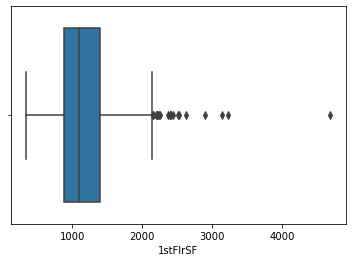

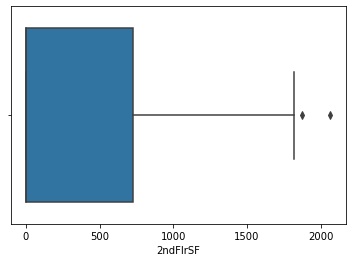

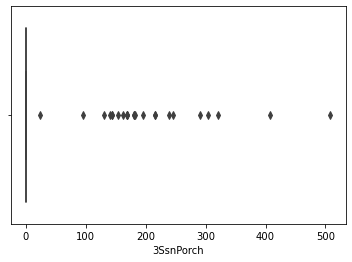

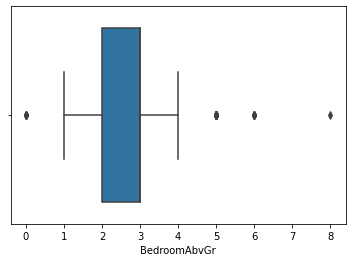

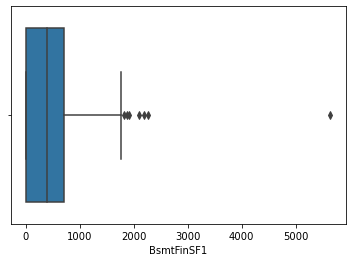

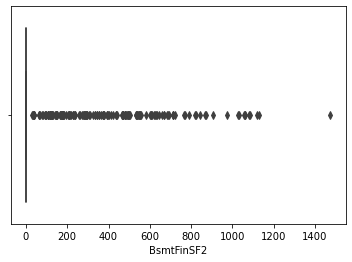

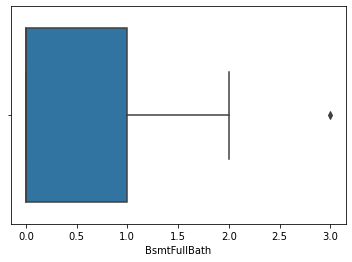

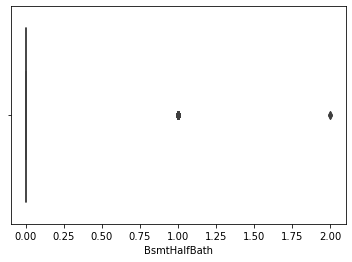

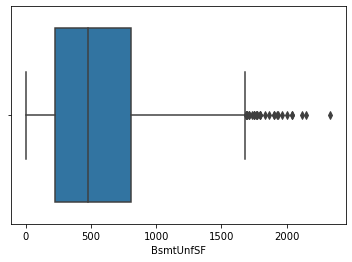

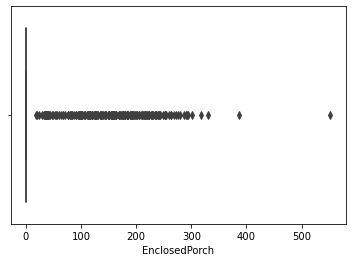

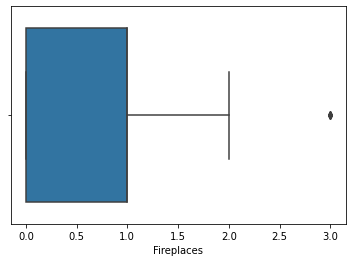

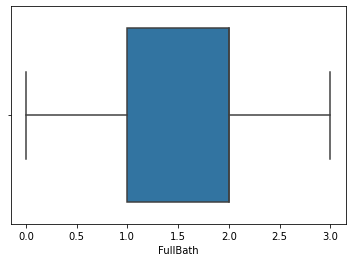

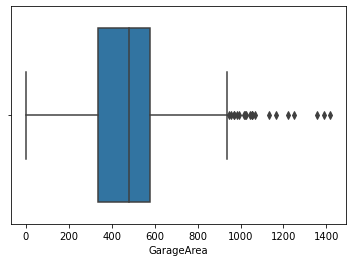

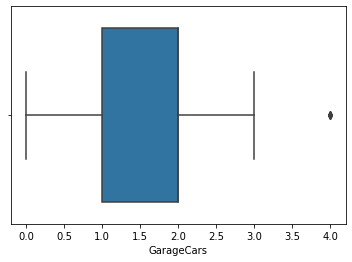

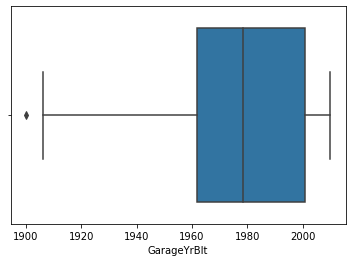

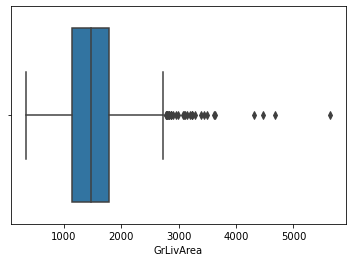

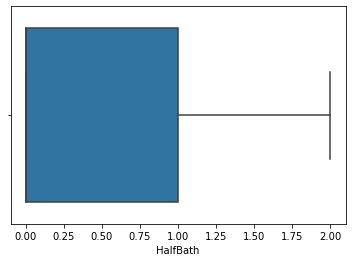

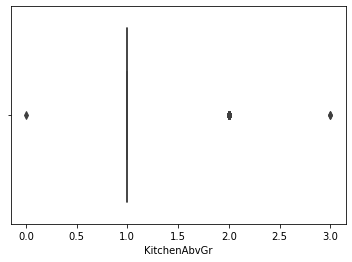

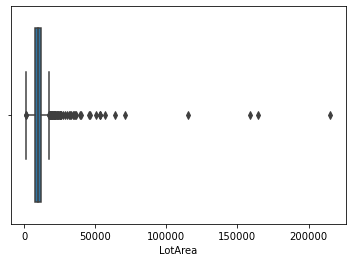

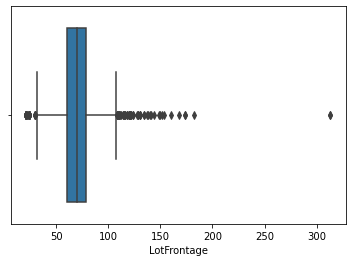

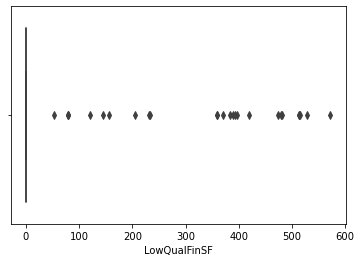

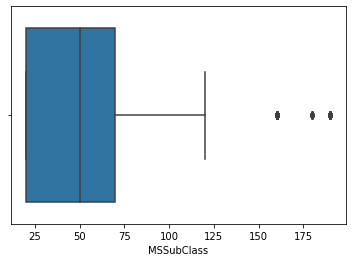

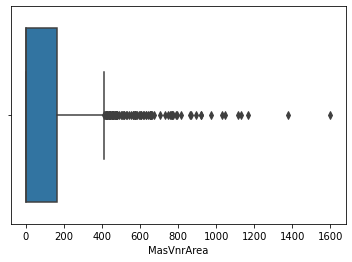

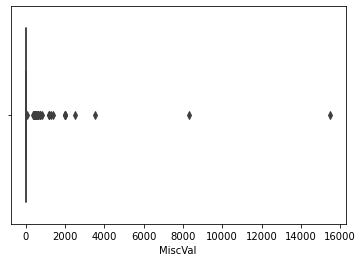

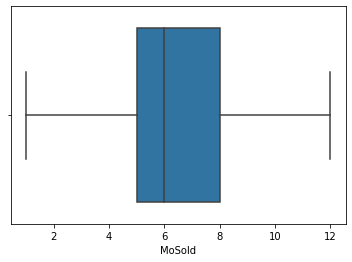

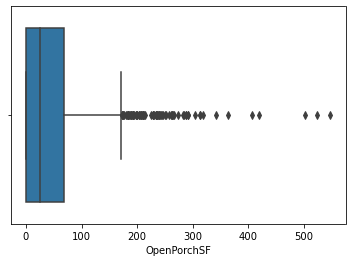

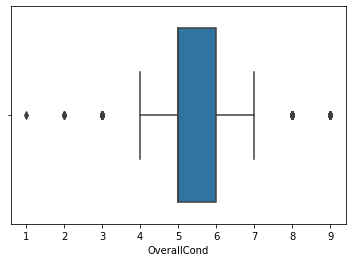

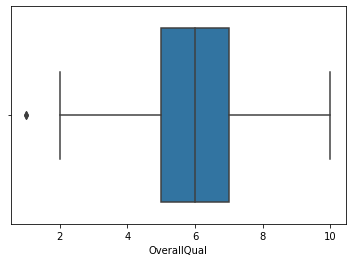

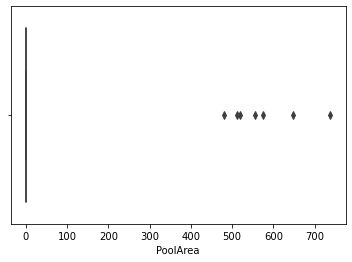

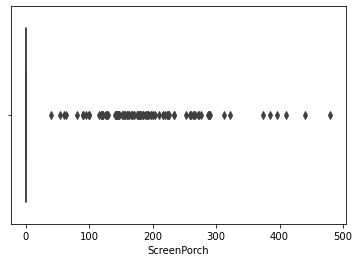

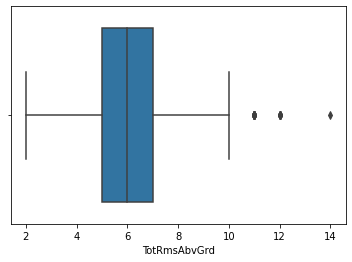

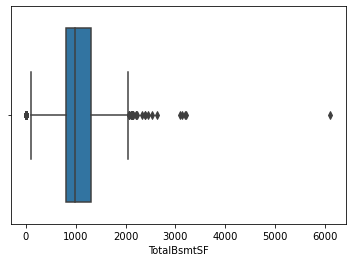

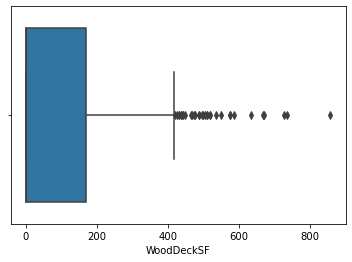

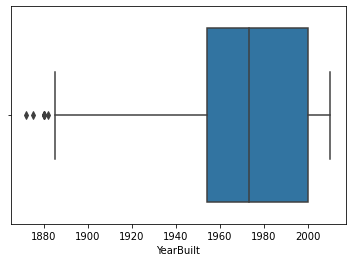

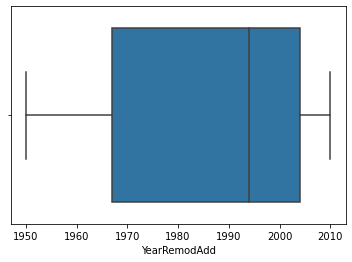

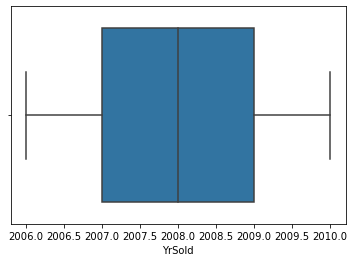

In [23]:
for col in column_numeric :
    plt.figure()
    sns.boxplot(train_df[col])
    warnings.filterwarnings('ignore')

On remarque que le column LotFrontage contient des valeur aberant donc on va remplacer les valeurs maquantes par le median.<br>
On remarque que le column GarageYrBlt ne contient pas des valeur aberant donc on va remplacer les valeurs maquantes par le moyenne.<br>
On remarque que le column MasVnrArea  contient des valeur aberant donc on va remplacer les valeurs maquantes par le median.


# Etude Correlation Target/variablle categorial :

In [24]:
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,RL,65.0,8450.0,Pave,No_alley_access,Reg,Lvl,AllPub,Inside,...,0.0,No_Pool,No_fence,None,0.0,2.0,2008.0,WD,Normal,208500
1,20.0,RL,80.0,9600.0,Pave,No_alley_access,Reg,Lvl,AllPub,FR2,...,0.0,No_Pool,No_fence,None,0.0,5.0,2007.0,WD,Normal,181500
2,60.0,RL,68.0,11250.0,Pave,No_alley_access,IR1,Lvl,AllPub,Inside,...,0.0,No_Pool,No_fence,None,0.0,9.0,2008.0,WD,Normal,223500
3,70.0,RL,60.0,9550.0,Pave,No_alley_access,IR1,Lvl,AllPub,Corner,...,0.0,No_Pool,No_fence,None,0.0,2.0,2006.0,WD,Abnorml,140000
4,60.0,RL,84.0,14260.0,Pave,No_alley_access,IR1,Lvl,AllPub,FR2,...,0.0,No_Pool,No_fence,None,0.0,12.0,2008.0,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,RL,62.0,7917.0,Pave,No_alley_access,Reg,Lvl,AllPub,Inside,...,0.0,No_Pool,No_fence,None,0.0,8.0,2007.0,WD,Normal,175000
1456,20.0,RL,85.0,13175.0,Pave,No_alley_access,Reg,Lvl,AllPub,Inside,...,0.0,No_Pool,MnPrv,None,0.0,2.0,2010.0,WD,Normal,210000
1457,70.0,RL,66.0,9042.0,Pave,No_alley_access,Reg,Lvl,AllPub,Inside,...,0.0,No_Pool,GdPrv,Shed,2500.0,5.0,2010.0,WD,Normal,266500
1458,20.0,RL,68.0,9717.0,Pave,No_alley_access,Reg,Lvl,AllPub,Inside,...,0.0,No_Pool,No_fence,None,0.0,4.0,2010.0,WD,Normal,142125


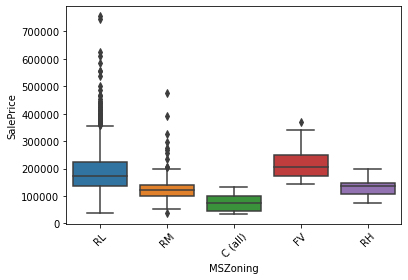

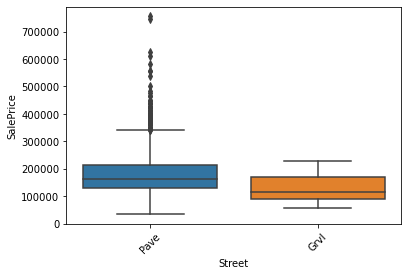

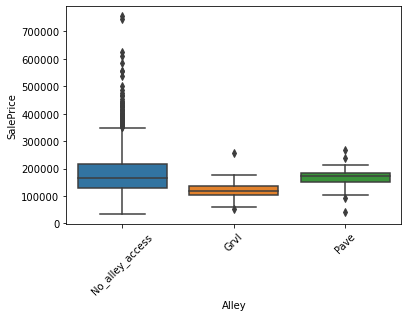

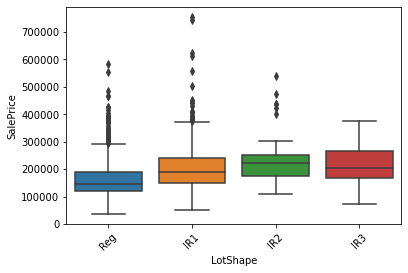

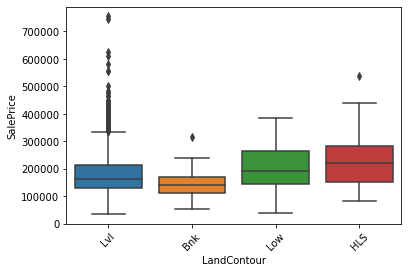

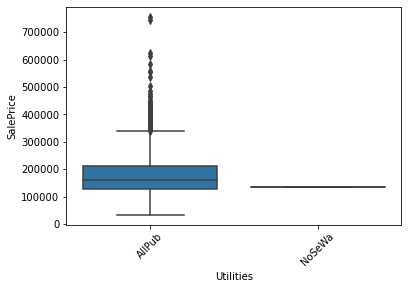

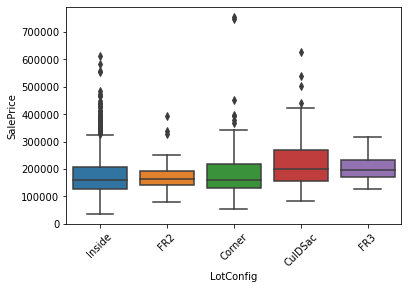

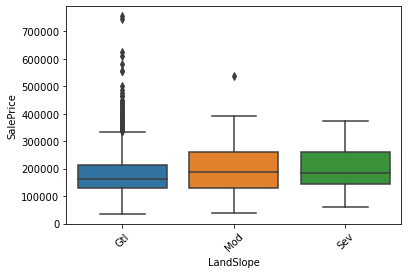

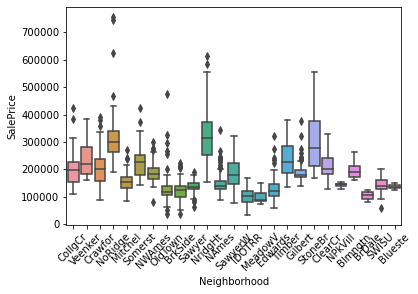

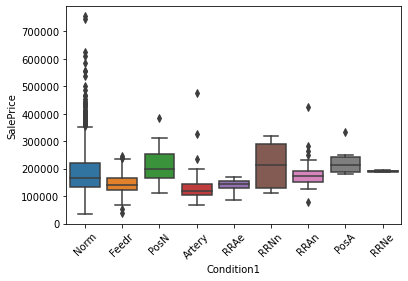

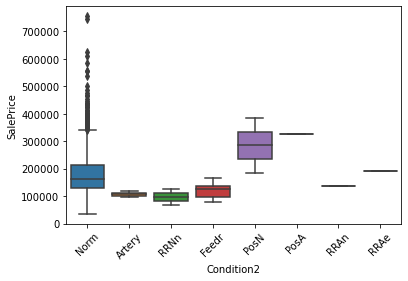

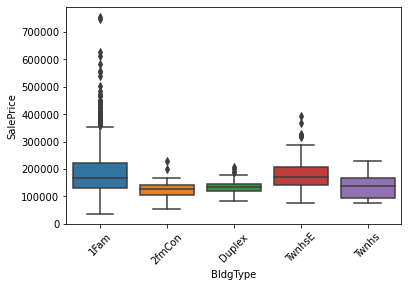

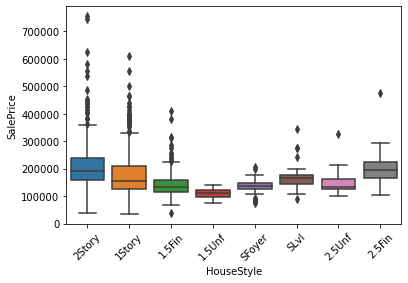

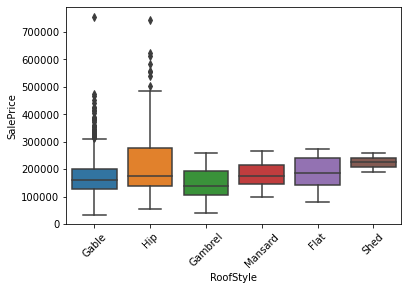

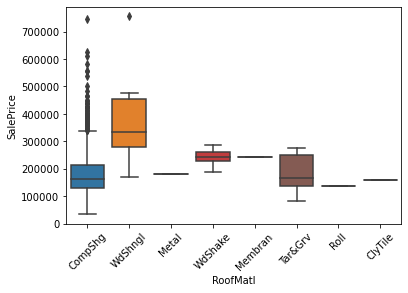

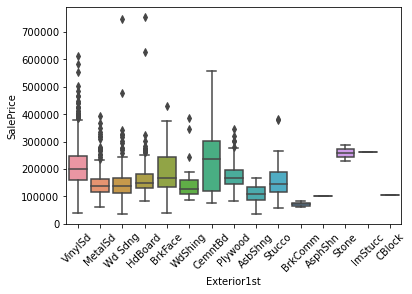

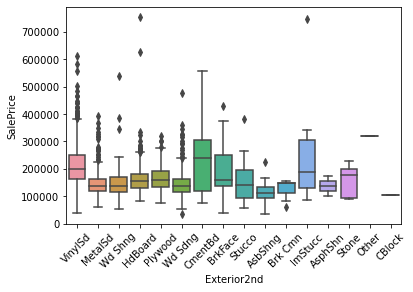

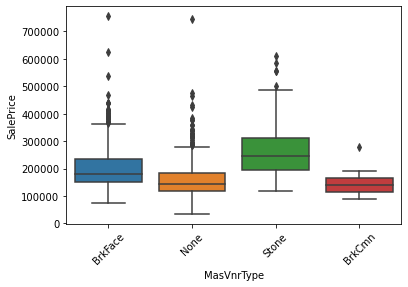

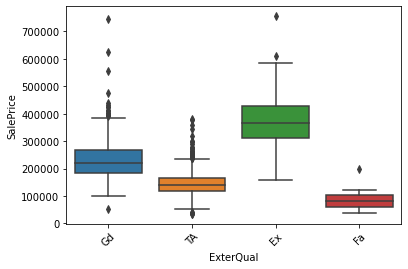

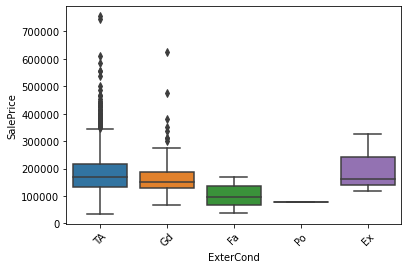

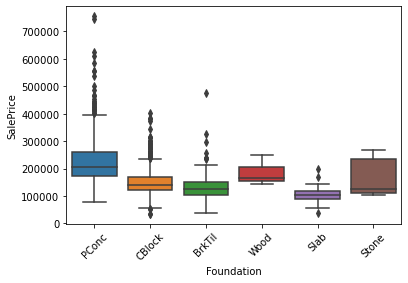

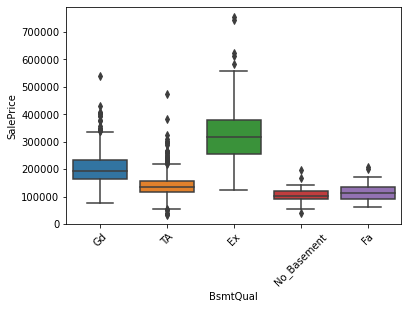

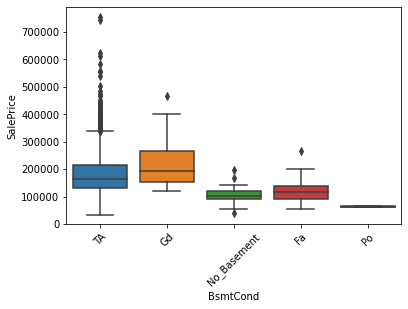

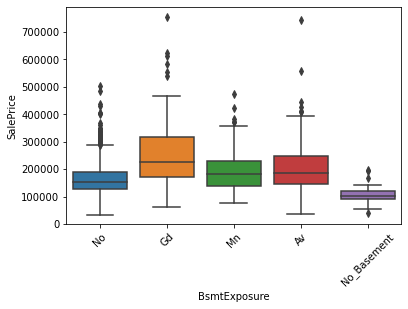

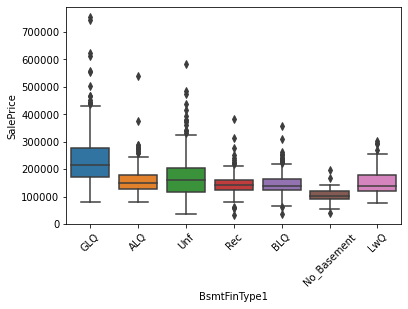

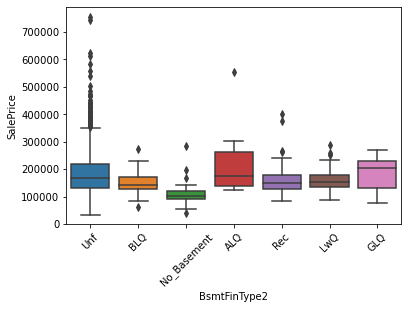

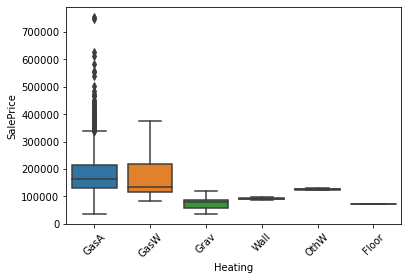

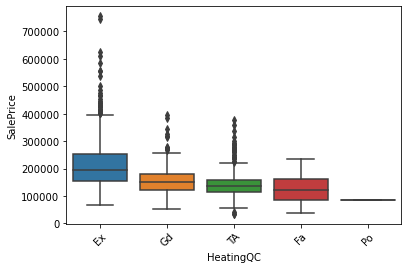

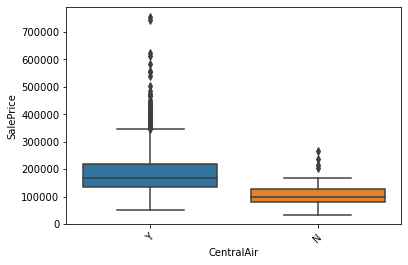

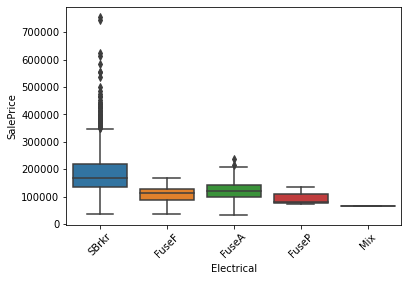

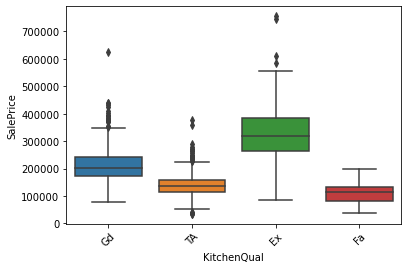

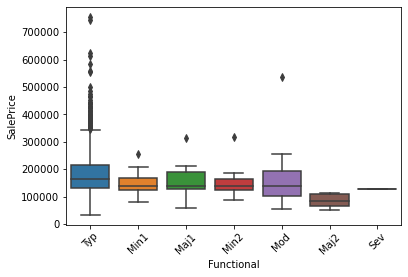

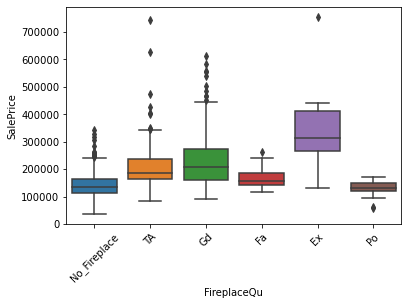

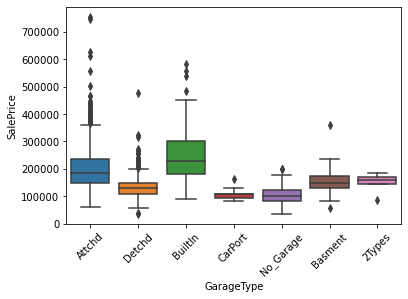

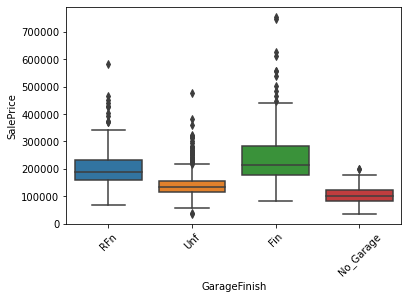

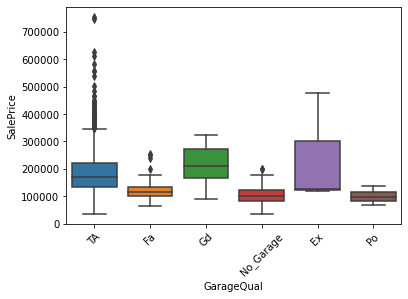

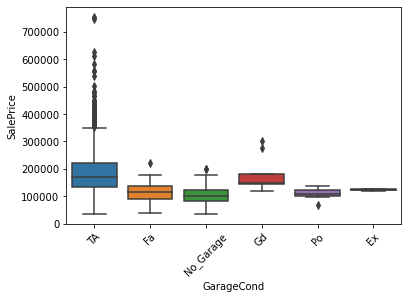

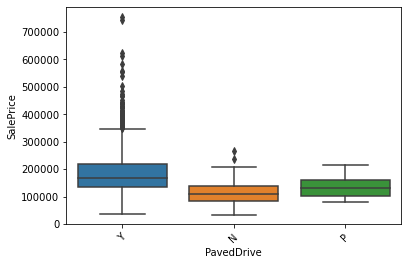

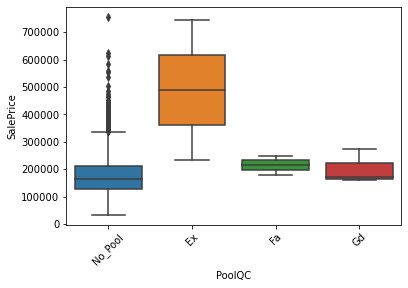

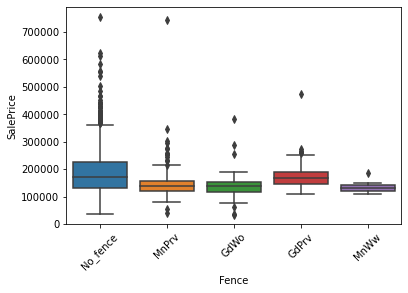

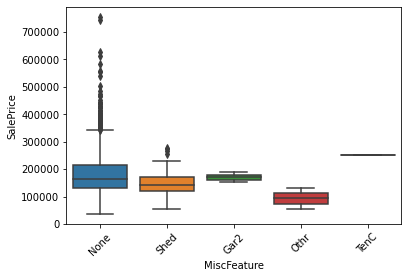

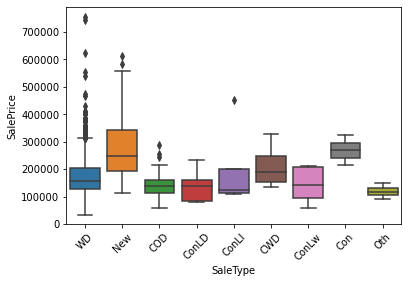

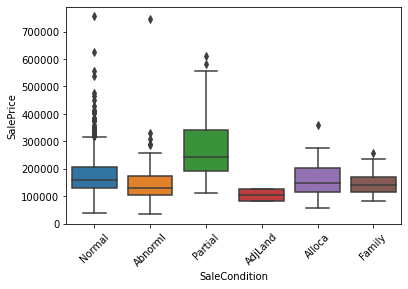

In [25]:
for col in column_object : 
    plt.figure()
    sns.boxplot(train_df[col],target)
    plt.xticks(rotation=45)
    warnings.filterwarnings('ignore')

In [26]:
best_categ=['MSZoning',
         'Neighborhood', 'Condition1', 'Condition2',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure',  'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond',  'PoolQC', 'MiscFeature',
       'SaleType', 'SaleCondition']

In [27]:
column_object

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

d'après les boxplot , On remarque que la plus part des variables qualitatives depend fortement de target. seule  les variables : <br>
-Lotshape, landContour,lotConfig,landslope,bigtype,BsmtFinType1,BsmtFinType2.

# Relation target/ variable numerique .

In [28]:
corr_=train_df[column_numeric_target].corr()
corr_


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [29]:
col_corr=corr_.loc[(corr_['SalePrice']>0.40)|(corr_['SalePrice']<-0.40),'SalePrice'].index
col_corr

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

In [30]:
best_categ_num=['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea','MSZoning',
         'Neighborhood', 'Condition1', 'Condition2',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure',  'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond',  'PoolQC', 'MiscFeature',
       'SaleType', 'SaleCondition']
len(best_categ_num)

44

<AxesSubplot:>

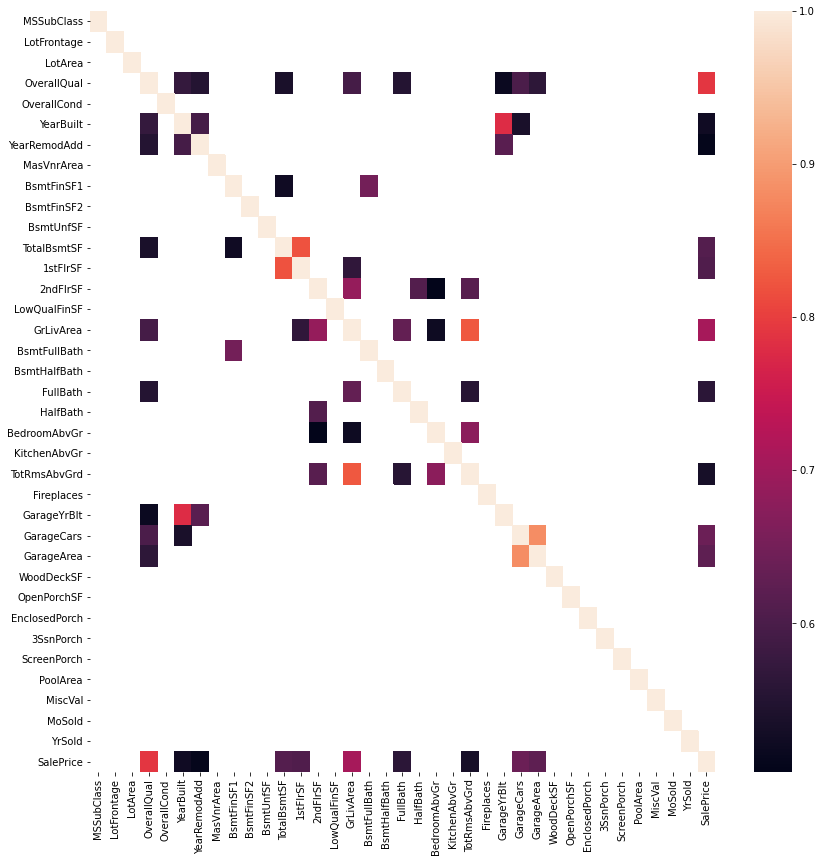

In [31]:
plt.figure(figsize=(14,14))
sns.heatmap(corr_[abs(corr_)>=0.5],annot_kws=None)


In [32]:
corr_.unstack()

MSSubClass  MSSubClass     1.000000
            LotFrontage   -0.357056
            LotArea       -0.139781
            OverallQual    0.032628
            OverallCond   -0.059316
                             ...   
SalePrice   PoolArea       0.092404
            MiscVal       -0.021190
            MoSold         0.046432
            YrSold        -0.028923
            SalePrice      1.000000
Length: 1369, dtype: float64

In [33]:
upper_corr_mat = corr_.where(np.triu(np.ones(corr_.shape), k=1).astype(np.bool))

In [34]:
unique_corr_ = upper_corr_mat.unstack().dropna() 

In [35]:
unique_corr_

LotFrontage  MSSubClass    -0.357056
LotArea      MSSubClass    -0.139781
             LotFrontage    0.306795
OverallQual  MSSubClass     0.032628
             LotFrontage    0.234196
                              ...   
SalePrice    ScreenPorch    0.111447
             PoolArea       0.092404
             MiscVal       -0.021190
             MoSold         0.046432
             YrSold        -0.028923
Length: 666, dtype: float64

In [36]:
unique_corr_[(unique_corr_>0.5)|(unique_corr_<-0.40)]

YearBuilt     OverallQual     0.572323
YearRemodAdd  OverallQual     0.550684
              YearBuilt       0.592855
BsmtUnfSF     BsmtFinSF1     -0.495251
TotalBsmtSF   OverallQual     0.537808
              BsmtFinSF1      0.522396
1stFlrSF      TotalBsmtSF     0.819530
GrLivArea     OverallQual     0.593007
              1stFlrSF        0.566024
              2ndFlrSF        0.687501
BsmtFullBath  BsmtFinSF1      0.649212
              BsmtUnfSF      -0.422900
FullBath      OverallQual     0.550600
              GrLivArea       0.630012
HalfBath      2ndFlrSF        0.609707
BedroomAbvGr  2ndFlrSF        0.502901
              GrLivArea       0.521270
TotRmsAbvGrd  2ndFlrSF        0.616423
              GrLivArea       0.825489
              FullBath        0.554784
              BedroomAbvGr    0.676620
GarageYrBlt   OverallQual     0.518018
              YearBuilt       0.780555
              YearRemodAdd    0.618130
GarageCars    OverallQual     0.600671
              YearBuilt  

On peux remarque qu'il y a plusieur vaiable q'ils ont une correlation qui superieur à 0.5  :<br>
              OverallQual     0.790982<br>
              YearBuilt       0.522897<br>
              YearRemodAdd    0.507101<br>
              TotalBsmtSF     0.613581<br>
              1stFlrSF        0.605852<br>
              GrLivArea       0.708624<br>
              FullBath        0.560664<br>
              TotRmsAbvGrd    0.533723<br>
              GarageCars      0.640409<br>
              GarageArea      0.623431<br>

In [37]:
best_Correlation=['MSZoning', 'LandContour',
'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition','OverallQual','YearBuilt','YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']

# Etude dependance variable categorial/categorial: 

In [38]:
for col in column_object :
    for coll in column_object :
        if col!=coll :
            d2=chi2_contingency(pd.crosstab(train_df[col], train_df[coll]))[1]
            if d2<10**(-10):
                print(f'{col}/{coll:-<20}{d2}')


MSZoning/Street--------------1.293331100878627e-19
MSZoning/Alley---------------6.370959191326918e-92
MSZoning/LotShape------------1.3596271487657125e-18
MSZoning/Neighborhood--------0.0
MSZoning/BldgType------------1.7470289640148326e-38
MSZoning/HouseStyle----------6.69732027767283e-33
MSZoning/Exterior1st---------1.0801339891685153e-24
MSZoning/Exterior2nd---------4.408207736287896e-27
MSZoning/ExterQual-----------3.212044230788349e-49
MSZoning/Foundation----------4.0712487035347877e-54
MSZoning/BsmtQual------------1.3941124619789547e-28
MSZoning/BsmtFinType1--------2.1952082290381836e-16
MSZoning/HeatingQC-----------2.0540067093628432e-13
MSZoning/CentralAir----------1.2217031702230047e-27
MSZoning/KitchenQual---------6.121036864257534e-25
MSZoning/FireplaceQu---------4.891012404712743e-13
MSZoning/GarageType----------2.6343861507571447e-46
MSZoning/GarageFinish--------2.6954891539084866e-31
MSZoning/GarageQual----------9.335607641373585e-15
MSZoning/PavedDrive----------7.513376581

RoofStyle/BsmtQual------------3.74340394470616e-19
RoofStyle/BsmtExposure--------1.3444516857016709e-11
RoofStyle/Functional----------5.841412825525037e-17
RoofStyle/MiscFeature---------1.7976006643530884e-66
RoofMatl/LotShape------------1.2222777710544592e-25
RoofMatl/LandContour---------4.707832047105065e-24
RoofMatl/LandSlope-----------1.6227087161895007e-55
RoofMatl/RoofStyle-----------6.136147395086713e-306
RoofMatl/Exterior1st---------9.011149230024665e-47
RoofMatl/Exterior2nd---------1.019953316448558e-12
RoofMatl/BsmtExposure--------1.581644176133396e-12
RoofMatl/Functional----------1.1710251130597854e-30
RoofMatl/PoolQC--------------1.0463758180453775e-98
Exterior1st/MSZoning------------1.0801339891684998e-24
Exterior1st/Alley---------------3.4402276404464934e-19
Exterior1st/Neighborhood--------8.393904589940628e-238
Exterior1st/BldgType------------1.0700664839809111e-19
Exterior1st/HouseStyle----------1.7697378958362876e-31
Exterior1st/RoofStyle-----------9.979189927640046e-1

Foundation/GarageFinish--------7.667479849380929e-82
Foundation/GarageQual----------1.1266695693752227e-47
Foundation/GarageCond----------1.4570805915007442e-21
Foundation/PavedDrive----------7.973424095092796e-32
Foundation/Fence---------------1.1282918638290698e-17
Foundation/SaleType------------1.184272973961819e-23
Foundation/SaleCondition-------2.1610043149812035e-30
BsmtQual/MSZoning------------1.3941124619789547e-28
BsmtQual/LotShape------------1.4479639098277377e-15
BsmtQual/Neighborhood--------5.405322486505554e-222
BsmtQual/Condition1----------4.071798543958151e-14
BsmtQual/BldgType------------7.312904987691766e-46
BsmtQual/HouseStyle----------7.0372244880147e-33
BsmtQual/RoofStyle-----------3.743403944706106e-19
BsmtQual/Exterior1st---------1.77011146328781e-86
BsmtQual/Exterior2nd---------3.324033769696465e-76
BsmtQual/MasVnrType----------6.2346193645620015e-55
BsmtQual/ExterQual-----------1.1072942200802533e-196
BsmtQual/Foundation----------0.0
BsmtQual/BsmtCond-----------

CentralAir/Exterior1st---------2.96666095866828e-33
CentralAir/Exterior2nd---------3.3501308140347057e-29
CentralAir/ExterQual-----------5.525330051023636e-25
CentralAir/ExterCond-----------9.726205478550682e-13
CentralAir/Foundation----------3.847231136984802e-41
CentralAir/BsmtQual------------2.6536064321628594e-25
CentralAir/BsmtCond------------3.304188031100606e-31
CentralAir/BsmtExposure--------3.758003023658587e-14
CentralAir/BsmtFinType1--------3.453329492748964e-20
CentralAir/BsmtFinType2--------8.649866446436074e-12
CentralAir/Heating-------------6.48169752857413e-66
CentralAir/HeatingQC-----------5.3971910080773145e-45
CentralAir/Electrical----------1.08608994461165e-55
CentralAir/KitchenQual---------1.4806225009699904e-37
CentralAir/FireplaceQu---------7.70154737613644e-12
CentralAir/GarageType----------1.8179465334404382e-39
CentralAir/GarageFinish--------5.957431986725068e-34
CentralAir/GarageQual----------1.908082048325956e-31
CentralAir/GarageCond----------2.092537926337

GarageQual/Neighborhood--------1.0437610131546246e-32
GarageQual/Condition2----------2.8508163024271767e-22
GarageQual/BldgType------------5.893474144902093e-14
GarageQual/HouseStyle----------2.4780633452175914e-22
GarageQual/MasVnrType----------9.391142880206263e-11
GarageQual/ExterQual-----------2.0941230254981577e-17
GarageQual/ExterCond-----------4.654005015218656e-27
GarageQual/Foundation----------1.1266695693752392e-47
GarageQual/BsmtQual------------2.2450410686300074e-27
GarageQual/BsmtCond------------5.515930807784736e-49
GarageQual/Heating-------------2.2054424357240224e-18
GarageQual/CentralAir----------1.9080820483259833e-31
GarageQual/Electrical----------3.2164915293177723e-137
GarageQual/KitchenQual---------4.658924511681183e-28
GarageQual/Functional----------1.020333660514073e-12
GarageQual/GarageType----------1.1310553781992e-310
GarageQual/GarageFinish--------0.0
GarageQual/GarageCond----------0.0
GarageQual/PavedDrive----------5.821029459573363e-46
GarageCond/Neighborh

In [39]:
#def correlation (df): 
    #df.drop(col_corr,axis=1,inplace=True)
    #return df 

In [40]:
#train_corr=correlation (train_df)
#test_corr=correlation (test_df)


In [41]:
#test_corr.shape

# Encoding 

In [42]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

In [43]:
#def Encoding(df):
    #encoder=OneHotEncoder()
    #df=encoder.fit_transform(df)
    #return df

In [44]:
def Encoding(df):
    encoder=OrdinalEncoder()
    df=encoder.fit_transform(df)
    return df

In [45]:
Encoding(train_df[column_object])

array([[3., 1., 1., ..., 1., 8., 4.],
       [3., 1., 1., ..., 1., 8., 4.],
       [3., 1., 1., ..., 1., 8., 4.],
       ...,
       [3., 1., 1., ..., 3., 8., 4.],
       [3., 1., 1., ..., 1., 8., 4.],
       [3., 1., 1., ..., 1., 8., 4.]])

In [46]:
Encoding(train_df[column_object])
Encoding(test_df[column_object])

array([[2., 1., 1., ..., 1., 8., 4.],
       [3., 1., 1., ..., 0., 8., 4.],
       [3., 1., 1., ..., 1., 8., 4.],
       ...,
       [3., 1., 1., ..., 1., 8., 0.],
       [3., 1., 1., ..., 3., 8., 4.],
       [3., 1., 1., ..., 1., 8., 4.]])

In [47]:
train_Encoder=train_df.copy()
test_Encoder=test_df.copy()

In [48]:
train_Encoder[column_object]=Encoding(train_Encoder[column_object])
test_Encoder[column_object]=Encoding(test_Encoder[column_object])

In [49]:
train_Encoder

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,3.0,65.0,8450.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,3.0,4.0,1.0,0.0,2.0,2008.0,8.0,4.0,208500
1,20.0,3.0,80.0,9600.0,1.0,1.0,3.0,3.0,0.0,2.0,...,0.0,3.0,4.0,1.0,0.0,5.0,2007.0,8.0,4.0,181500
2,60.0,3.0,68.0,11250.0,1.0,1.0,0.0,3.0,0.0,4.0,...,0.0,3.0,4.0,1.0,0.0,9.0,2008.0,8.0,4.0,223500
3,70.0,3.0,60.0,9550.0,1.0,1.0,0.0,3.0,0.0,0.0,...,0.0,3.0,4.0,1.0,0.0,2.0,2006.0,8.0,0.0,140000
4,60.0,3.0,84.0,14260.0,1.0,1.0,0.0,3.0,0.0,2.0,...,0.0,3.0,4.0,1.0,0.0,12.0,2008.0,8.0,4.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,3.0,62.0,7917.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,3.0,4.0,1.0,0.0,8.0,2007.0,8.0,4.0,175000
1456,20.0,3.0,85.0,13175.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,3.0,2.0,1.0,0.0,2.0,2010.0,8.0,4.0,210000
1457,70.0,3.0,66.0,9042.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,3.0,0.0,3.0,2500.0,5.0,2010.0,8.0,4.0,266500
1458,20.0,3.0,68.0,9717.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,3.0,4.0,1.0,0.0,4.0,2010.0,8.0,4.0,142125


In [50]:
test_Encoder

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20.0,2.0,80.0,11622.0,1.0,1.0,3.0,3.0,0.0,4.0,...,120.0,0.0,2.0,2.0,1.0,0.0,6.0,2010.0,8.0,4.0
1,20.0,3.0,81.0,14267.0,1.0,1.0,0.0,3.0,0.0,0.0,...,0.0,0.0,2.0,4.0,0.0,12500.0,6.0,2010.0,8.0,4.0
2,60.0,3.0,74.0,13830.0,1.0,1.0,0.0,3.0,0.0,4.0,...,0.0,0.0,2.0,2.0,1.0,0.0,3.0,2010.0,8.0,4.0
3,60.0,3.0,78.0,9978.0,1.0,1.0,0.0,3.0,0.0,4.0,...,0.0,0.0,2.0,4.0,1.0,0.0,6.0,2010.0,8.0,4.0
4,120.0,3.0,43.0,5005.0,1.0,1.0,0.0,1.0,0.0,4.0,...,144.0,0.0,2.0,4.0,1.0,0.0,1.0,2010.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160.0,4.0,21.0,1936.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.0,2.0,4.0,1.0,0.0,6.0,2006.0,8.0,4.0
1455,160.0,4.0,21.0,1894.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.0,2.0,4.0,1.0,0.0,4.0,2006.0,8.0,0.0
1456,20.0,3.0,160.0,20000.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.0,2.0,4.0,1.0,0.0,9.0,2006.0,8.0,0.0
1457,85.0,3.0,62.0,10441.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.0,2.0,2.0,3.0,700.0,7.0,2006.0,8.0,4.0


# Normalisation 

In [51]:
from sklearn.preprocessing import StandardScaler 

In [52]:
def Normalisation(df):
    standard=StandardScaler()
    df=standard.fit_transform(df)
    return df

In [53]:
train_Normalase=pd.DataFrame(Normalisation(train_Encoder),columns=train_Encoder.columns)

In [54]:
test_Normalase=pd.DataFrame(Normalisation(test_Encoder),columns=test_Encoder.columns)

In [55]:
train_Normalase.drop('SalePrice',axis=1,inplace=True)

In [56]:
train_Normalase

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.073375,-0.045532,-0.229372,-0.207142,0.064238,0.024699,0.750731,0.314667,-0.02618,0.604670,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-1.599111,0.138777,0.313867,0.208502
1,-0.872563,-0.045532,0.451936,-0.091886,0.064238,0.024699,0.750731,0.314667,-0.02618,-0.628316,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-0.489110,-0.614439,0.313867,0.208502
2,0.073375,-0.045532,-0.093110,0.073480,0.064238,0.024699,-1.378933,0.314667,-0.02618,0.604670,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,0.990891,0.138777,0.313867,0.208502
3,0.309859,-0.045532,-0.456474,-0.096897,0.064238,0.024699,-1.378933,0.314667,-0.02618,-1.861302,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-1.599111,-1.367655,0.313867,-3.426284
4,0.073375,-0.045532,0.633618,0.375148,0.064238,0.024699,-1.378933,0.314667,-0.02618,-0.628316,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,2.100892,0.138777,0.313867,0.208502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.045532,-0.365633,-0.260560,0.064238,0.024699,0.750731,0.314667,-0.02618,0.604670,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,0.620891,-0.614439,0.313867,0.208502
1456,-0.872563,-0.045532,0.679039,0.266407,0.064238,0.024699,0.750731,0.314667,-0.02618,0.604670,...,-0.270208,-0.068692,0.063305,-1.390058,-0.185975,-0.087688,-1.599111,1.645210,0.313867,0.208502
1457,0.309859,-0.045532,-0.183951,-0.147810,0.064238,0.024699,0.750731,0.314667,-0.02618,0.604670,...,-0.270208,-0.068692,0.063305,-3.237563,5.190736,4.953112,-0.489110,1.645210,0.313867,0.208502
1458,-0.872563,-0.045532,-0.093110,-0.080160,0.064238,0.024699,0.750731,0.314667,-0.02618,0.604670,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-0.859110,1.645210,0.313867,0.208502


In [57]:
upper_corr_mat

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,NaN,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,NaN,NaN,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,NaN,NaN,NaN,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,NaN,NaN,NaN,NaN,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,NaN,NaN,NaN,NaN,NaN,-0.375983,0.073741,-0.127788,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,NaN,NaN,NaN,NaN,NaN,NaN,0.592855,0.314745,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.179186,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.263582,-0.072302,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [58]:
test_Normalase.shape

(1459, 79)

In [59]:
test_Normalase

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.874711,-1.501777,0.544280,0.363929,0.06426,0.083814,0.742620,0.31870,0.0,0.572445,...,1.818960,-0.057227,0.043675,-1.348162,-0.175956,-0.092244,-0.038281,1.713905,0.32475,0.201383
1,-0.874711,-0.039098,0.592916,0.897861,0.06426,0.083814,-1.384637,0.31870,0.0,-1.950811,...,-0.301543,-0.057227,0.043675,0.470579,-2.997051,19.730438,-0.038281,1.713905,0.32475,0.201383
2,0.061351,-0.039098,0.252467,0.809646,0.06426,0.083814,-1.384637,0.31870,0.0,0.572445,...,-0.301543,-0.057227,0.043675,-1.348162,-0.175956,-0.092244,-1.140614,1.713905,0.32475,0.201383
3,0.061351,-0.039098,0.447009,0.032064,0.06426,0.083814,-1.384637,0.31870,0.0,0.572445,...,-0.301543,-0.057227,0.043675,0.470579,-0.175956,-0.092244,-0.038281,1.713905,0.32475,0.201383
4,1.465443,-0.039098,-1.255236,-0.971808,0.06426,0.083814,-1.384637,-2.53396,0.0,0.572445,...,2.243060,-0.057227,0.043675,0.470579,-0.175956,-0.092244,-1.875504,1.713905,0.32475,0.201383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.401505,1.423581,-2.325218,-1.591330,0.06426,0.083814,0.742620,0.31870,0.0,0.572445,...,-0.301543,-0.057227,0.043675,0.470579,-0.175956,-0.092244,-0.038281,-1.359958,0.32475,0.201383
1455,2.401505,1.423581,-2.325218,-1.599808,0.06426,0.083814,0.742620,0.31870,0.0,0.572445,...,-0.301543,-0.057227,0.043675,0.470579,-0.175956,-0.092244,-0.773170,-1.359958,0.32475,-3.589818
1456,-0.874711,-0.039098,4.435126,2.055150,0.06426,0.083814,0.742620,0.31870,0.0,0.572445,...,-0.301543,-0.057227,0.043675,0.470579,-0.175956,-0.092244,1.064053,-1.359958,0.32475,-3.589818
1457,0.646389,-0.039098,-0.331160,0.125527,0.06426,0.083814,0.742620,0.31870,0.0,0.572445,...,-0.301543,-0.057227,0.043675,-1.348162,5.466235,1.017827,0.329164,-1.359958,0.32475,0.201383


# feture Selection :

In [60]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras import optimizers 

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_Normalase, target, test_size=0.3, random_state=42)

In [110]:
# unit : le nombre des noeuds
model=Sequential()
model.add(Dense(units=20,activation='linear',input_dim=79))
model.add(Dense(units=20,activation='relu'))
#model.add(Dense(units=65,activation='relu'))
#model.add(Dense(units=65,activation='relu'))
#model.add(Dense(units=65,activation='relu'))
model.add(Dense(units=1,activation='linear'))

print(model.summary())
# epochs : on va repasser notre base des données au moin trois fois .
# batchsize : la taille de sous groupe. 

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 20)                1600      
                                                                 
 dense_50 (Dense)            (None, 20)                420       
                                                                 
 dense_51 (Dense)            (None, 1)                 21        
                                                                 
Total params: 2,041
Trainable params: 2,041
Non-trainable params: 0
_________________________________________________________________
None


In [111]:
model.compile(loss='mse',optimizer=optimizers.Adam(learning_rate=0.1),metrics=['mse'])
model.fit(X_train, y_train,epochs=10,batch_size=1) 

Epoch 1/10
1022/1022 [==============================] - 3s 3ms/step - loss: 8229056512.0000 - mse: 8229056512.0000
Epoch 2/10
1022/1022 [==============================] - 3s 3ms/step - loss: 2857347328.0000 - mse: 2857347328.0000
Epoch 3/10
1022/1022 [==============================] - 2s 2ms/step - loss: 2214446336.0000 - mse: 2214446336.0000
Epoch 4/10
1022/1022 [==============================] - 2s 2ms/step - loss: 2119514240.0000 - mse: 2119514240.0000
Epoch 5/10
1022/1022 [==============================] - 3s 3ms/step - loss: 1852585728.0000 - mse: 1852585728.0000
Epoch 6/10
1022/1022 [==============================] - 3s 3ms/step - loss: 1599353472.0000 - mse: 1599353472.0000
Epoch 7/10
1022/1022 [==============================] - 3s 3ms/step - loss: 2079273088.0000 - mse: 2079273088.0000
Epoch 8/10
1022/1022 [==============================] - 3s 3ms/step - loss: 1437431808.0000 - mse: 1437431808.0000
Epoch 9/10
1022/1022 [==============================] - 3s 3ms/step - loss: 1258

In [103]:
p=model.predict(test_Normalase)
p.ravel()

46/46 [==============================] - 0s 2ms/step


array([125046.53 , 216700.55 , 173365.55 , ..., 192579.38 , 128864.836,
       284771.8  ], dtype=float32)

In [104]:
predictions=model.predict(test_Normalase)
predictions=pd.DataFrame({'SalePrice':predictions.ravel()},index=ID)
predictions.to_csv('prediction5.csv')

46/46 [==============================] - 0s 2ms/step


# Modelisation 

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [423]:
param_grid={'n_neighbors':np.arange(2,20),'metric':['euclidean','manhattan']}
grid=GridSearchCV(KNeighborsRegressor(),param_grid,cv=5)
grid.fit(train_Normalase,target)
model=grid.best_estimator_
predictions=model.predict(test_Normalase)

In [424]:
grid.best_score_

0.8046701201110658

In [425]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 7}

In [426]:
predictions

array([129892.85714286, 151950.        , 196842.85714286, ...,
       135435.71428571, 109228.57142857, 215484.28571429])

In [59]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(train_Normalase,target,test_size=0.2, random_state=42)

# Regession linear 

In [60]:
from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm


In [388]:
from sklearn.linear_model import LinearRegression
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(LinearRegression(),parameters, cv=5)
grid.fit(train_Normalase,target)
model=grid.best_estimator_
predictions=model.predict(test_Normalase)
print(grid.best_score_)
predictions

-9461.54800358368


array([ 1.24656792e+17, -4.52571846e+16,  1.16057256e+16, ...,
       -3.46104041e+15,  1.97430324e+16, -2.22474343e+16])

In [389]:
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
import math
best_features=[]
best_feat=[]
min_=1000000
for i in np.arange(2,80):
        rfe_selector = RFE(estimator = LinearRegression(), n_features_to_select= i, step = 1)
        rfe_selector.fit(train_Normalase, target)
        #best_features.append(list(train_Normalase.columns[rfe_selector.get_support()]))
        best_features=list(train_Normalase.columns[rfe_selector.get_support()])
        #print(best_features)
        model=LinearRegression()
        reg=model.fit(train_x[best_features],train_y)
        pridection=reg.predict(test_x[best_features])
        RMSE= mean_squared_error(test_y,pridection, squared=False)
        if RMSE<min_:
            min_=RMSE
            best_feat=best_features
            print(i,RMSE)
        
best_feat  

2 45462.77339666344
3 41191.94066936827
4 39415.07032846976
5 39005.122979422566
6 38153.205734978066
7 37087.678054239506
8 36291.02339253997
9 36262.11382616859
15 35921.63703736969
16 35657.14379698027
17 34908.81033226809
19 34824.023465188955
29 34753.435316820694
30 34653.69929161517
31 34556.61636283747
32 34554.2614792159
35 34455.66935896161
36 34275.66447391064
37 34244.46524705184
39 34100.813078394596
41 34007.48937168142
43 33982.064592253795


['MSSubClass',
 'LotFrontage',
 'LotArea',
 'Street',
 'LandContour',
 'Neighborhood',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'SaleCondition']

In [390]:
ml=LinearRegression()
reg=ml.fit(train_Normalase,target)
pridections=reg.predict(test_Normalase)
pridections

array([-1.62817465e+16,  5.23291984e+15, -1.80615424e+15, ...,
       -4.89184181e+13, -4.33185040e+15,  3.18776973e+15])

In [391]:
predictions=pd.DataFrame({'SalePrice':predictions},index=ID)
predictions.to_csv('prediction2.csv')

In [410]:
def makeplots(y,ypred):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(y,ypred)
    plt.xlabel('y true')
    plt.ylabel('y pred')
    xx=np.linspace(0,50,50)
    plt.plot(xx,xx,'k-')

    plt.subplot(1, 2, 2)
    n, bins, _ = plt.hist(y,bins='auto', label='y true', density=1)
    _ = plt.hist(ypred,bins=bins, label='y pred', density=1)
    plt.legend()

Fitted weights: 
 [-5.21672730e+03 -1.26170660e+03 -5.23221290e+03  3.52017648e+03
  1.27540862e+03  6.94108233e+02 -1.54676000e+03  2.09457879e+03
 -1.43836231e+03  4.89342950e+01  3.00180784e+03  2.44935340e+03
 -5.29715362e+02 -2.79670581e+03 -3.39045935e+03 -2.23686033e+03
  1.48331060e+04  5.74045003e+03  6.76828529e+03  6.04153855e+02
  2.12704566e+03  3.17623780e+03 -4.22485863e+03  2.48074329e+03
  2.61913810e+03  5.28815968e+03 -6.10499387e+03  3.59278446e+01
  7.32061377e+02 -6.55170259e+03  2.31063342e+03 -4.18101825e+03
 -1.02552114e+03 -1.55578466e+16  1.38320473e+03 -5.50272089e+15
 -1.50724119e+16  1.49645663e+16 -2.77988623e+02 -1.40916464e+02
  3.37471004e+02 -3.81372928e+02  3.35344712e+16  3.78665664e+16
  4.21779887e+15 -4.55826842e+16  3.93453588e+03 -6.40364045e+02
  1.18106182e+03 -3.15259854e+02 -1.60073209e+03 -2.63566703e+03
 -7.77200745e+03  6.55741872e+03  4.34091923e+03  3.74192256e+03
 -1.47468316e+03  1.15740399e+02  1.83104622e+02 -1.22647205e+03
  8.482

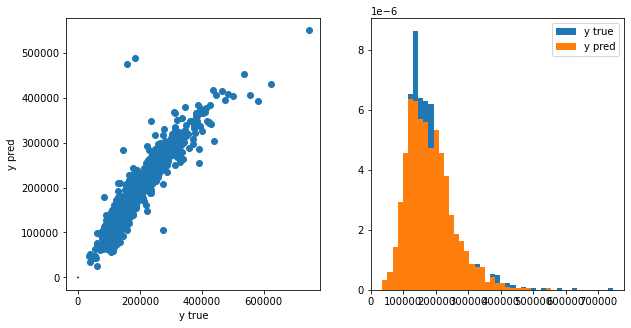

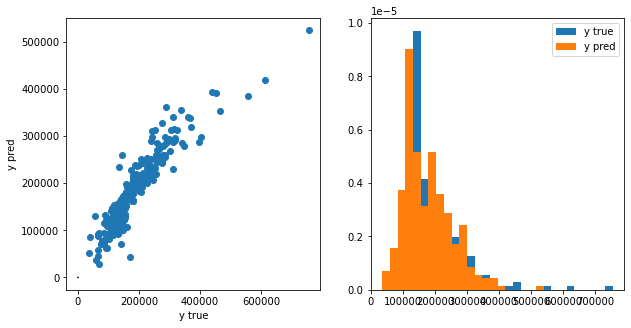

In [411]:
# Fit of the model
model1 = LinearRegression()
reg = model1.fit(X_train, y_train)

# Get parameters
print('Fitted weights: \n',reg.coef_)
print('Bias term:',reg.intercept_)

# Predicted targets
y_train_pred = reg.predict(X_train)

# plots
makeplots(y_train,y_train_pred)

# Quality of the fit
print('RMS: %.3f' % np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('\nR2 Score: %.3f' % reg.score(X_train, y_train))

# Test sample
y_test_pred = reg.predict(X_test)

print('RMS: %.3f' % np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('\nR2 Score: %.3f' % reg.score(X_test, y_test))

# Some plots
makeplots(y_test,y_test_pred)

Fitted weights: 
 [-3422.85558515  -727.72996676 -2521.79532999  3016.30912067
  1092.282211     597.56249125 -1627.45374108  1266.77394028
 -1013.67377489    19.07936632  2477.22059018  2392.73237505
  -187.95427746 -1899.17530038 -2835.23579463 -1292.20435494
 11672.4313754   3732.78730699  2652.67132505  2367.05531137
  2624.47797264  2449.55678917 -1840.70104868   638.3643221
  2015.27834042  4559.37072733 -5706.62389649   175.86361552
  1634.84121985 -6124.32583067  1540.4091219  -3545.88805663
 -1230.40416378  2829.86306219   358.91072906   564.49030118
  -130.67687039  3018.00876404   -70.15154751 -1388.76570827
   961.46458665  -190.91994217  5775.02894009  5542.39734158
  -332.49099567  8822.02804735  3199.34005034  -548.44081522
  3546.60175691  1588.1932685   -296.0833082  -2732.7553386
 -7182.00518762  5940.30654779  3212.11074889  4544.15689246
 -1572.04458053  -488.76976994   510.40905093 -1975.57609161
  5721.22186793  3508.04049723 -1001.51338396   553.37706172
   907.9

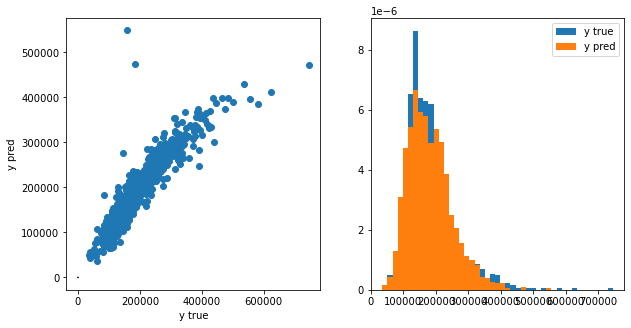

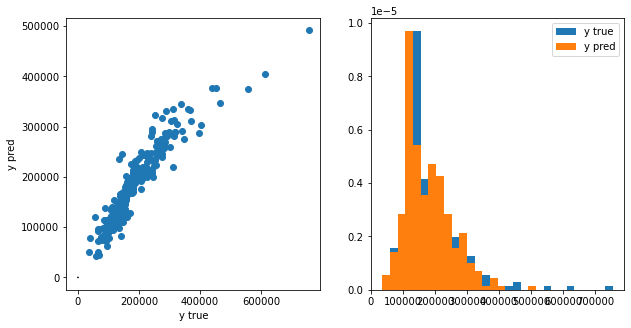

In [419]:
# define model
model2 = Ridge(alpha=300) # Alpha sets the lambda (yes...) hyperparameter 
reg = model2.fit(X_train, y_train)

# Get parameters
print('Fitted weights: \n',reg.coef_)
print('Bias term:',reg.intercept_)

# Predicted targets
y_train_pred = reg.predict(X_train)

# plots
makeplots(y_train,y_train_pred)

# Quality of the fit
print('RMSE: %.3f' % np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('\nR2 Score: %.3f' % reg.score(X_train, y_train))

# Test sample
y_test_pred = reg.predict(X_test)

print('RMS: %.3f' % np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('\nR2 Score: %.3f' % reg.score(X_test, y_test))

# Some plots
makeplots(y_test,y_test_pred)


In [432]:
for i in np.arange(0,10,0.5): 
    model3 = Lasso(alpha=0.5)
    reg = model3.fit(X_train, y_train)

    # Get parameters
    #print('Fitted weights: \n',reg.coef_)
    print('Bias term:',reg.intercept_)

    # Predicted targets
    y_train_pred = reg.predict(X_train)

    # plots
    #makeplots(y_train,y_train_pred)

    # Quality of the fit
    print('RMS: %.3f' % np.sqrt(mean_squared_error(y_train,y_train_pred)))
    print('\nR2 Score: %.3f' % reg.score(X_train, y_train))

    # Test sample
    y_test_pred = reg.predict(X_test)

    print('RMS: %.3f' % np.sqrt(mean_squared_error(y_test,y_test_pred)))
    print('\nR2 Score: %.3f' % reg.score(X_test, y_test))

    # Some plots
    #makeplots(y_test,y_test_pred)


Bias term: 180323.82940757557
RMS: 29699.125

R2 Score: 0.852
RMS: 34715.000

R2 Score: 0.843
Bias term: 180323.82940757557
RMS: 29699.125

R2 Score: 0.852
RMS: 34715.000

R2 Score: 0.843
Bias term: 180323.82940757557
RMS: 29699.125

R2 Score: 0.852
RMS: 34715.000

R2 Score: 0.843
Bias term: 180323.82940757557
RMS: 29699.125

R2 Score: 0.852
RMS: 34715.000

R2 Score: 0.843
Bias term: 180323.82940757557
RMS: 29699.125

R2 Score: 0.852
RMS: 34715.000

R2 Score: 0.843
Bias term: 180323.82940757557
RMS: 29699.125

R2 Score: 0.852
RMS: 34715.000

R2 Score: 0.843
Bias term: 180323.82940757557
RMS: 29699.125

R2 Score: 0.852
RMS: 34715.000

R2 Score: 0.843
Bias term: 180323.82940757557
RMS: 29699.125

R2 Score: 0.852
RMS: 34715.000

R2 Score: 0.843
Bias term: 180323.82940757557
RMS: 29699.125

R2 Score: 0.852
RMS: 34715.000

R2 Score: 0.843
Bias term: 180323.82940757557
RMS: 29699.125

R2 Score: 0.852
RMS: 34715.000

R2 Score: 0.843
Bias term: 180323.82940757557
RMS: 29699.125

R2 Score: 0.85

Fitted weights: 
 [-4.83564449e+03 -1.07272647e+03 -4.49821075e+03  3.32304191e+03
  1.23659459e+03  6.72666324e+02 -1.63230981e+03  1.91780359e+03
 -1.32526618e+03  2.19328311e+01  2.98097261e+03  2.49732543e+03
 -4.18163151e+02 -2.55468982e+03 -3.19690468e+03 -2.06235147e+03
  1.42362528e+04  4.99664214e+03  4.71707285e+03  1.35237431e+03
  2.38033549e+03  2.93323133e+03 -3.35426789e+03  1.69883380e+03
  2.42050515e+03  5.07273731e+03 -5.88194143e+03  8.00922392e+01
  1.27294889e+03 -6.58217488e+03  2.09300980e+03 -4.06715980e+03
 -1.21748759e+03  1.98952303e+03  9.22062546e+02  8.59008362e+02
 -1.12147485e+03  1.25471371e+03 -1.89908309e+02 -5.20337925e+02
  5.68345042e+02 -3.79567961e+02  7.71206551e+03  6.69408033e+03
 -8.14451865e+02  1.11592086e+04  3.77886608e+03 -5.81935106e+02
  2.34825254e+03  5.03445157e+02 -1.22315189e+03 -2.73567429e+03
 -7.66257092e+03  6.54875441e+03  4.01106510e+03  4.08577268e+03
 -1.46475142e+03 -4.65362010e+00  1.17087103e+02 -1.53312993e+03
  7.150

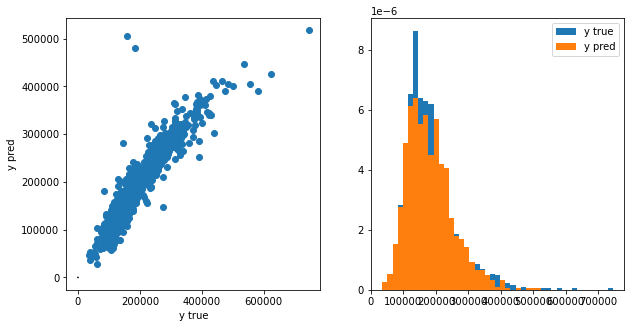

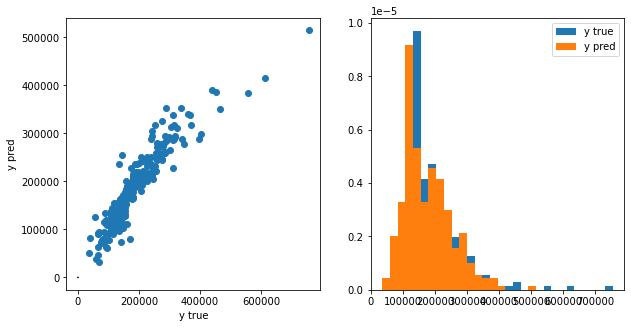

In [436]:
# define model

model4 = BayesianRidge()
reg=model4.fit(X_train, y_train)


# Get parameters
print('Fitted weights: \n',reg.coef_)
print('Bias term:',reg.intercept_)

# Predicted targets
y_train_pred = reg.predict(X_train)

# plots
makeplots(y_train,y_train_pred)

# Quality of the fit
print('RMSE: %.3f' % np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('\nR2 Score: %.3f' % reg.score(X_train, y_train))

# Test sample
y_test_pred = reg.predict(X_test)

print('RMS: %.3f' % np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('\nR2 Score: %.3f' % reg.score(X_test, y_test))

# Some plots
makeplots(y_test,y_test_pred)


Fitted weights: 
 [-4.80553379e+03 -1.06233054e+03 -4.45519084e+03  3.31410298e+03
  1.23485347e+03  6.71742971e+02 -1.63393286e+03  1.90523203e+03
 -1.31816049e+03  2.11685446e+01  2.97490327e+03  2.49746149e+03
 -4.12574220e+02 -2.54098405e+03 -3.18961386e+03 -2.04974657e+03
  1.41902195e+04  4.96185077e+03  4.63412068e+03  1.38613257e+03
  2.39117013e+03  2.92116901e+03 -3.31043562e+03  1.66191577e+03
  2.41051256e+03  5.06074456e+03 -5.87478861e+03  8.31832821e+01
  1.29321054e+03 -6.57896429e+03  2.08050364e+03 -4.05807029e+03
 -1.22350840e+03  2.01623984e+03  9.00980781e+02  8.50161781e+02
 -1.09021036e+03  1.31011833e+03 -1.85619711e+02 -5.40449606e+02
  5.79770622e+02 -3.78038252e+02  7.64284227e+03  6.66609741e+03
 -8.00181758e+02  1.10868310e+04  3.76806161e+03 -5.80057330e+02
  2.39734434e+03  5.39979707e+02 -1.20117188e+03 -2.73962841e+03
 -7.65563479e+03  6.54131620e+03  3.99312329e+03  4.10216731e+03
 -1.46575577e+03 -1.28204371e+01  1.18762807e+02 -1.54659297e+03
  7.097

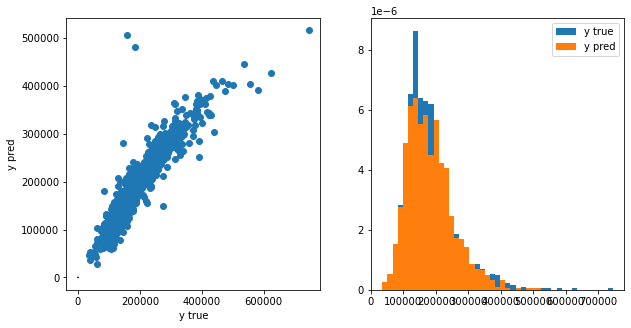

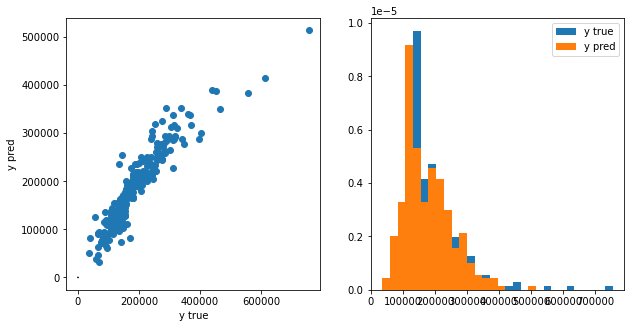

In [441]:
# define model

model5 = ElasticNet(alpha = 0.1)
reg=model5.fit(X_train, y_train)


# Get parameters
print('Fitted weights: \n',reg.coef_)
print('Bias term:',reg.intercept_)

# Predicted targets
y_train_pred = reg.predict(X_train)

# plots
makeplots(y_train,y_train_pred)

# Quality of the fit
print('RMSE: %.3f' % np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('\nR2 Score: %.3f' % reg.score(X_train, y_train))

# Test sample
y_test_pred = reg.predict(X_test)

print('RMS: %.3f' % np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('\nR2 Score: %.3f' % reg.score(X_test, y_test))

# Some plots
makeplots(y_test,y_test_pred)


In [ ]:
bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

# 5. ElasticNet




# RandomForeste

In [69]:
from sklearn.ensemble import RandomForestRegressor
Forest=RandomForestRegressor()
Forest.fit(train_Normalase[best__],target)
predictions_Forest=Forest.predict(test_Normalase[best__])
prediction_Forest=pd.DataFrame({'SalePrice':predictions_Forest},index=ID)
prediction_Forest.to_csv('prediction_Forest5.csv')

## Avec les resultat de RFE

In [394]:
Forest=RandomForestRegressor()
Forest.fit(train_Normalase[best_feat],target)
predictions_Forest_RFE=Forest.predict(test_Normalase[best_feat])
predictions_Forest_RFE

array([129287.66, 154868.5 , 185123.77, ..., 151980.5 , 123245.5 ,
       230040.69])

In [395]:
predictions_Forest_RFE=pd.DataFrame({'SalePrice':predictions_Forest_RFE},index=ID)
predictions_Forest_RFE.to_csv('predictions_Forest_RFE.csv')

## Best correlation 

In [396]:
Forest=RandomForestRegressor()
Forest.fit(train_Normalase[best_Correlation],target)
predictions_Forest_corr=Forest.predict(test_Normalase[best_Correlation])
predictions_Forest_corr
predictions_Forest_corr=pd.DataFrame({'SalePrice':predictions_Forest_corr},index=ID)
predictions_Forest_corr.to_csv('predictions_Forest_corr.csv')

# Avec SelectFromModel 

In [397]:
from sklearn.feature_selection import SelectFromModel

In [398]:
selector=SelectFromModel(RandomForestRegressor(),threshold='mean')
selector.fit_transform(train_Normalase,target)
feature_idx = selector.get_support()
feature_name = train_Normalase.columns[feature_idx]
feature_name

Index(['OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageCars', 'GarageArea'],
      dtype='object')

In [399]:
selector.transform(test_Normalase)
feature_name = train_Normalase.columns[feature_idx]
feature_name

Index(['OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageCars', 'GarageArea'],
      dtype='object')

In [400]:
Forest=RandomForestRegressor()
Forest.fit(train_Normalase[feature_name],target)
predictions_Forest_FromModel=Forest.predict(test_Normalase[feature_name])
predictions_Forest_FromModel
predictions_Forest_FromModel=pd.DataFrame({'SalePrice':predictions_Forest_FromModel},index=ID)
predictions_Forest_FromModel.to_csv('predictions_Forest_FromModel.csv')

# RFECV 

In [71]:
from sklearn.feature_selection import RFECV

In [73]:
selector=RFECV(RandomForestRegressor(),step=1,min_features_to_select=2,cv=5)
selector.fit(train_Normalase[column_object],target)
selector.grid_scores_
    

array([0.54845548, 0.63226993, 0.64575705, 0.65084378, 0.65996135,
       0.66576149, 0.68296971, 0.69101797, 0.69496123, 0.68598455,
       0.69946682, 0.69904096, 0.70671682, 0.71057307, 0.71257938,
       0.70652796, 0.70843544, 0.70444092, 0.71298559, 0.7189444 ,
       0.71822879, 0.72440223, 0.72038763, 0.72142949, 0.72205711,
       0.72569551, 0.72136062, 0.72830513, 0.72472733, 0.72066134,
       0.72305618, 0.72131326, 0.72098922, 0.72230424, 0.72658311,
       0.72391826, 0.72086025, 0.72335401, 0.72104388, 0.71853474,
       0.72377105, 0.72304828])

In [75]:
selector.get_support()

array([ True, False, False,  True,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
        True,  True, False,  True, False,  True,  True,  True, False,
       False, False,  True,  True, False,  True,  True])

In [77]:
feature_idx =selector.get_support()
feature_name = train_Normalase[column_object].columns[feature_idx]
feature_name

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'PoolQC', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [82]:
best_=['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'PoolQC', 'Fence', 'SaleType', 'SaleCondition','LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

In [83]:
len(best_)

47

In [91]:
Forest=RandomForestRegressor()
Forest.fit(train_Normalase[best_categ_num],target)
predictions_Forest_RFECV=Forest.predict(test_Normalase[best_categ_num])
predictions_Forest_RFECV
predictions_Forest_RFECV=pd.DataFrame({'SalePrice':predictions_Forest_RFECV},index=ID)
predictions_Forest_RFECV.to_csv('predictions_Forest_RFECV3.csv')

# Pipline 

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# create pipeline
for i in np.arange(2,50):
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=22)
    model = LinearRegression()
    pipeline = Pipeline(steps=[('s',rfe),('m',model)])
    # evaluate model
    cv=KFold(n_splits=i)
    n_scores = cross_val_score(pipeline,train_Normalase,target, scoring='neg_mean_squared_error', cv=cv)
    # report performance
    print(abs(n_scores)**0.5)
    print(np.mean(abs(n_scores)**0.5))

In [404]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
models_with_scores = {}
for i in range(1,len(train_df.columns)):
    # create pipeline
    rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=i)
    model = LinearRegression()
    pipeline = Pipeline(steps=[('pca', PCA()),('m',model)])
    # evaluate model
    cv=KFold(n_splits=5)
    n_scores = cross_val_score(pipeline, train_Normalase,target, scoring='neg_mean_squared_error', cv=cv)
    # report performance
    print(abs(n_scores)**0.5)
    print(np.mean(abs(n_scores)**0.5))
    
    models_with_scores[pipeline]=np.mean(abs(n_scores)**0.5) 

#get the best model and use it to predict for new data
models  = list(sorted(models_with_scores.items(), key=lambda item: item[1]))
best_model=  models[0][0]
#use it to predict for new data
print(best_model)
best_model.fit(train_Normalase,target)
predictions_Forest_PIP=best_model.predict(test_Normalase)
predictions_Forest_PIP=pd.DataFrame({'SalePrice':predictions_Forest_PIP},index=ID)
predictions_Forest_PIP.to_csv('predictions_Forest_PIP.csv')


[43226.91783631 48486.47097997 55105.99702205 44359.68699252
 51285.30597499]
48492.87576116776
[37003.44813403 42963.79399946 45636.04954018 38956.66720532
 48375.01441358]
42586.994658514566


KeyboardInterrupt: 

In [433]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
models_with_scores = {}
for i in range(1,len(train_df.columns)):
    # create pipeline
    rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=i)
    model = LinearRegression()
    pipeline = Pipeline(steps=[('pca', PCA()),('m',model)])
    # evaluate model
    cv=KFold(n_splits=5)
    n_scores = cross_val_score(pipeline, train_Normalase,target, scoring='neg_mean_squared_error', cv=cv)
    # report performance
    print(abs(n_scores)**0.5)
    print(np.mean(abs(n_scores)**0.5))
    
    models_with_scores[pipeline]=np.mean(abs(n_scores)**0.5) 

#get the best model and use it to predict for new data
models  = list(sorted(models_with_scores.items(), key=lambda item: item[1]))
best_model=  models[0][0]
#use it to predict for new data
print(best_model)
best_model.fit(train_Normalase,target)
predictions_PCA=best_model.predict(test_Normalase)
predictions_PCA=pd.DataFrame({'SalePrice':predictions_PCA},index=ID)
predictions_PCA.to_csv('predictions_PCA.csv')


[2.85545440e+04 3.54010604e+04 3.30598642e+04 1.62432180e+15
 5.00369771e+04]
324864360974447.75
[2.85545440e+04 3.54010604e+04 3.30598642e+04 1.62432180e+15
 5.00369771e+04]
324864360974447.75
[2.85545440e+04 3.54010604e+04 3.30598642e+04 1.62432180e+15
 5.00369771e+04]
324864360974447.75
[2.85545440e+04 3.54010604e+04 3.30598642e+04 1.62432180e+15
 5.00369771e+04]
324864360974447.75
[2.85545440e+04 3.54010604e+04 3.30598642e+04 1.62432180e+15
 5.00369771e+04]
324864360974447.75
[2.85545440e+04 3.54010604e+04 3.30598642e+04 1.62432180e+15
 5.00369771e+04]
324864360974447.75
[2.85545440e+04 3.54010604e+04 3.30598642e+04 1.62432180e+15
 5.00369771e+04]
324864360974447.75
[2.85545440e+04 3.54010604e+04 3.30598642e+04 1.62432180e+15
 5.00369771e+04]
324864360974447.75
[2.85545440e+04 3.54010604e+04 3.30598642e+04 1.62432180e+15
 5.00369771e+04]
324864360974447.75
[2.85545440e+04 3.54010604e+04 3.30598642e+04 1.62432180e+15
 5.00369771e+04]
324864360974447.75
[2.85545440e+04 3.54010604e+04

In [ ]:
print(best_model)

In [ ]:
best_model.fit(train_Normalase,target)
predictions_LR=best_model.predict(test_Normalase)
predictions_LR=pd.DataFrame({'SalePrice':predictions_LR},index=ID)
predictions_LR.to_csv('predictions_LR.csv')

# GardientBoostingRegressior

In [420]:
from sklearn.ensemble import GradientBoostingRegressor

In [421]:
model=GradientBoostingRegressor()
model.fit(train_Normalase,target)
predictions_GBR=best_model.predict(test_Normalase)
predictions_GBR=pd.DataFrame({'SalePrice':predictions_GBR},index=ID)
predictions_GBR.to_csv('predictions_GBR.csv')

In [ ]:
Anova
Pearson
studente